In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

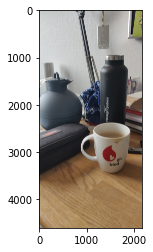

In [4]:
im = cv2.imread('week1_img.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)


plt.imshow(im)

In [23]:
# Ex 1.11

def box3d(n):
    row1 = np.vstack([np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),-0.5*np.ones([1,n]),-0.5*np.ones([1,n])])
    row2 = np.vstack([np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),-0.5*np.ones([1,n]),0.5*np.ones([1,n])])
    row3 = np.vstack([np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),0.5*np.ones([1,n]),-0.5*np.ones([1,n])])
    row4 = np.vstack([np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),0.5*np.ones([1,n]),0.5*np.ones([1,n])])
    row5 = np.vstack([np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),-0*np.ones([1,n]),-0*np.ones([1,n])])
    row6 = np.vstack([-0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),-0.5*np.ones([1,n])])
    row7 = np.vstack([0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),-0.5*np.ones([1,n])])
    row8 = np.vstack([-0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),0.5*np.ones([1,n])])
    row9 = np.vstack([0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),0.5*np.ones([1,n])])
    row10 = np.vstack([-0*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),-0*np.ones([1,n])])
    row11 = np.vstack([-0.5*np.ones([1,n]),-0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n))])
    row12 = np.vstack([0.5*np.ones([1,n]),-0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n))])
    row13 = np.vstack([-0.5*np.ones([1,n]),0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n))])
    row14 = np.vstack([0.5*np.ones([1,n]),0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n))])
    row15 = np.vstack([-0*np.ones([1,n]),-0*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n))])

    
    
    box = np.hstack([row1,row2,row3,row4,row5,row6,row7,row8,row9,row10,row11,row12,row13,row14,row15])
    return box



(3, 240)


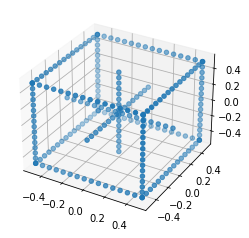

In [24]:
Q = box3d(16)
print(Q.shape)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Q[0,:],Q[1,:],Q[2,:])
plt.show()

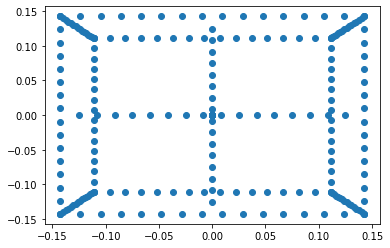

In [59]:
# Exercise 1.12
def projectpoints(K,R,t,Q):
    extrin = np.hstack([R,t])
    P = K@extrin
    Q_h = np.vstack([Q,np.ones([1,Q.shape[1]])])
    q_h = P@Q_h
    q = q_h[:-1]/q_h[-1]
    return q



K = np.identity(3)
R = np.identity(3)
t = np.array([[0,0,4]]).T


q = projectpoints(K,R,t,Q)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(q[0,:],q[1,:])
plt.show()

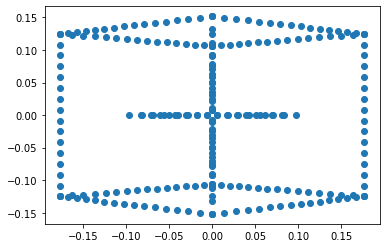

In [56]:
# Exercise 1.13
theta = 45
theta_r = theta*np.pi/180
R = np.array([[np.cos(theta_r),0,np.sin(theta_r)],
             [0,1,0],
             [-np.sin(theta_r),0,np.cos(theta_r)]])
extrin = np.hstack([R,t])
P = K@extrin

Q_h = np.vstack([Q,np.ones([1,Q.shape[1]])])
q_h = P@Q_h
q = q_h[:-1]/q_h[-1]
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(q[0,:],q[1,:])
plt.show()